<a href="https://colab.research.google.com/github/jeffersonramelo/Paper-pos-doc/blob/main/estat%C3%ADtica_descritiva_box_correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

# Caminho para o arquivo XLSX
caminho_arquivo = '/content/dados todos sem escala.xlsx'

# Lê o arquivo XLSX
dados = pd.read_excel(caminho_arquivo)

excluir setor financeiro e empresas com PL negativo, numeros faltante e transformar eventuais caracteres em números

In [29]:
# Agora, vamos remover as linhas onde 'd9' seja igual a 1
#dados = dados[dados['d11'] != 1]
# Converte a coluna 'PL2010' para números (float) e remove as linhas onde 'PL2010' seja negativo
dados['PL2010'] = pd.to_numeric(dados['PL2010'], errors='coerce')  # 'coerce' trata strings não numéricas como NaN
dados = dados[dados['PL2010'] > 0]

# Agora, vamos remover as linhas onde 'VM30Abril11' seja igual a '-'
dados = dados[dados['VM30Abril2011'] != '-']
dados = dados[dados['PL2010'] != '-']
dados = dados[dados['LL2010'] != '-']
dados = dados[dados['AT2009'] != '-']
dados = dados[dados['AT2009'] != '0']

#transforma as variáveis em números
dados['AT2009'] = pd.to_numeric(dados['AT2009'], errors='coerce')
dados['LL2010'] = pd.to_numeric(dados['LL2010'], errors='coerce')
dados['VM30Abril2011'] = pd.to_numeric(dados['VM30Abril2011'], errors='coerce')
dados['PL2010'] = pd.to_numeric(dados['PL2010'], errors='coerce')

# Lista de variáveis que você deseja escalonar
variaveis = ['VM30Abril2011', 'PL2010', 'LL2010', 'AT2009']

# Verifique o tipo de dados de cada coluna
for coluna in variaveis:
    print(f"Tipo de dados da coluna {coluna}: {dados[coluna].dtype}")


Tipo de dados da coluna VM30Abril2011: float64
Tipo de dados da coluna PL2010: float64
Tipo de dados da coluna LL2010: float64
Tipo de dados da coluna AT2009: float64


In [30]:
import pandas as pd

# Suponhamos que seus dados já estejam carregados no DataFrame "dados"

# Visualizar as primeiras linhas do DataFrame
print(dados.head())

# Realizar a análise estatística descritiva por ano para a variável "t"
anos = list(range(2010, 2023))
for ano in anos:
    # Filtrar os dados para o ano atual
    dados_ano = dados[dados['t'] == ano]  # Substitua 'Ano' pelo nome da coluna que contém o ano

    # Descrever estatisticamente a variável "t" para o ano atual
    descricao = dados_ano['VM30Abril2011'].describe()

    print(f"Ano {ano}:")
    print(descricao)
    print("\n")


     COD     t  VM30Abril2011      PL2010     LL2010      AT2009
0  EALT4  2010       60727.50    45809.00    5927.00   143196.00
1  ALPA4  2010     3893923.32  1310475.00  306341.00  1748959.00
2  ABEV3  2010   142208240.76 24361863.00 7561383.00 40101017.00
3  AMER3  2010     2382110.32   225945.00   33587.00  2324320.00
4  CBEE3  2010     4773373.56  1583469.00  216092.00  4589050.00
Ano 2010:
count         171.00
mean      9042730.38
std      35477161.21
min         12011.11
25%        502044.33
50%       1905996.00
75%       5749471.90
max     358424796.86
Name: VM30Abril2011, dtype: float64


Ano 2011:
count         177.00
mean      8912317.97
std      32068880.42
min         13018.17
25%        316510.36
50%       1912173.00
75%       5935760.06
max     285904040.53
Name: VM30Abril2011, dtype: float64


Ano 2012:
count         179.00
mean      8745846.84
std      30284599.05
min         24000.00
25%        544129.63
50%       2204622.71
75%       6265282.70
max     257595865.60


In [31]:
import pandas as pd

# Suponhamos que seus dados já estejam carregados no DataFrame "dados"

# Selecionar as colunas de interesse
colunas_interesse = ['VM30Abril2011', 'PL2010', 'LL2010', 'AT2009']
dados_interesse = dados[colunas_interesse]

# Calcular a estatística descritiva para as colunas de interesse
estatisticas_descritivas = dados_interesse.describe()

# Definir o formato de exibição para notação decimal com 2 casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)

# Exibir as estatísticas descritivas
print(estatisticas_descritivas)


       VM30Abril2011       PL2010       LL2010       AT2009
count        2495.00      2495.00      2495.00      2495.00
mean     10894864.71   6512127.78    737366.43  16114325.00
std      35533261.56  26262430.67   6038277.74  64002439.21
min          1917.51       177.00 -44212187.00        30.68
25%        492697.50    479315.00      4729.50   1024780.50
50%       2383101.03   1341127.00    100526.00   3301169.00
75%       7608375.65   3952657.50    457993.50  10135865.00
max     559359926.33 387329000.00 188328000.00 987419000.00


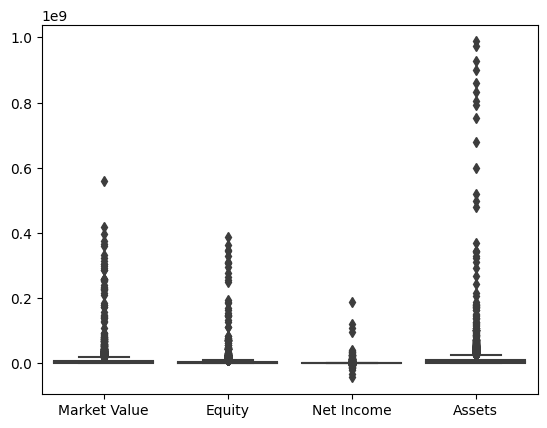

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Renomeie as colunas para os rótulos em inglês
dados = dados.rename(columns={'VM30Abril2011': 'Market Value',
                              'PL2010': 'Equity',
                              'LL2010': 'Net Income',
                              'AT2009': 'Assets'})

# Crie um gráfico de box plot com os rótulos em inglês
sns.boxplot(data=dados[['Market Value', 'Equity', 'Net Income', 'Assets']])

plt.show()


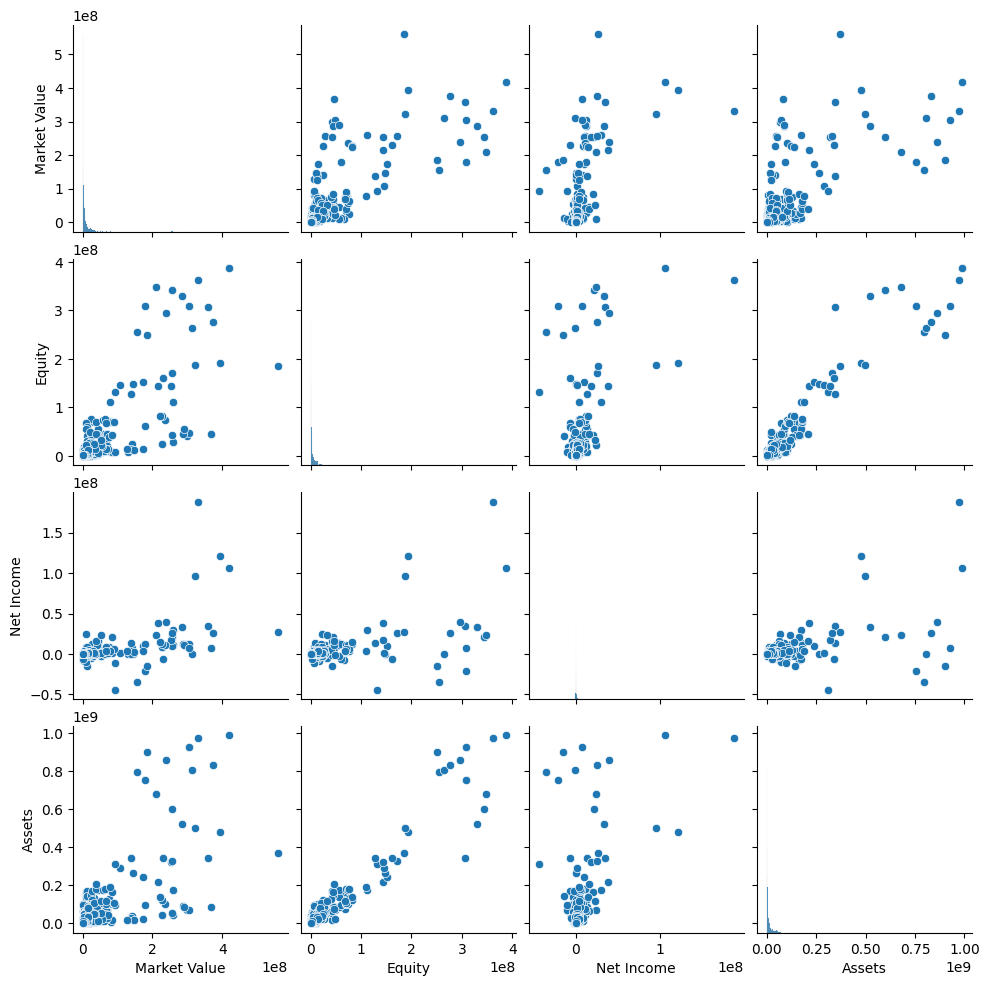

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Renomeie as colunas para os rótulos em inglês
dados = dados.rename(columns={'VM30Abril2011': 'Market Value',
                              'PL2010': 'Equity',
                              'LL2010': 'Net Income',
                              'AT2009': 'Assets'})

# Crie gráficos de dispersão para todas as combinações de variáveis
sns.pairplot(dados[['Market Value', 'Equity', 'Net Income', 'Assets']])
plt.show()


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dados[['VM30Abril2011', 'PL2010', 'LL2010', 'AT2009']], showfliers=False)
plt.show()


KeyError: ignored

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Selecionar as variáveis de interesse
variaveis = ['VM30Abril2011', 'PL2010', 'LL2010', 'AT2009']

# Inicializar um DataFrame para armazenar os coeficientes de correlação e os p-valores
correlacao_df = pd.DataFrame(index=variaveis, columns=variaveis)

# Calcular a correlação e o p-valor para cada par de variáveis
for var1 in variaveis:
    for var2 in variaveis:
        if var1 != var2:
            coef_corr, p_valor = pearsonr(dados[var1], dados[var2])
            correlacao_df.at[var1, var2] = coef_corr  # Armazena o coeficiente de correlação
            correlacao_df.at[var2, var1] = p_valor     # Armazena o p-valor

# Visualize a matriz de correlação e p-valores
print("Matriz de Correlação:")
print(correlacao_df)

# Destaque os p-valores significativos (geralmente um valor limite de 0.05 é usado)
significativo = correlacao_df.applymap(lambda x: '*' if float(x) < 0.05 else '')

# Visualize os p-valores significativos
print("Significativo:")
print(significativo)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=dados[['VM30Abril2011', 'PL2010', 'LL2010', 'AT2009']])
plt.show()
